In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
import sys
sys.path.append('../')

In [5]:
from backend.procdata import *

In [6]:
import urllib.request
import json
import pprint

In [13]:
covid_df = get_covid_df()

In [24]:
df = get_google_mobility_df(covid_df)

In [30]:
df[pd.isnull(df['metro_area'])]['country'].nunique()

133

In [32]:
df[df['country'] == 'Russia']

,country,metro_area,date,pc_retail_and_recreation,pc_grocery_and_pharmacy,pc_parks,pc_transit_stations,pc_workplaces,pc_residential
907830,Russia,NaN,2020-02-15,10.0,8.0,1.0,8.0,1.0,-1.0
907831,Russia,NaN,2020-02-16,8.0,7.0,3.0,6.0,3.0,0.0
907832,Russia,NaN,2020-02-17,4.0,4.0,-1.0,3.0,1.0,1.0
907833,Russia,NaN,2020-02-18,7.0,5.0,5.0,5.0,2.0,0.0
907834,Russia,NaN,2020-02-19,7.0,5.0,6.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
910681,Russia,Yekaterinburg Metropolitan Area,2020-07-27,-13.0,0.0,82.0,-6.0,-34.0,3.0
910682,Russia,Yekaterinburg Metropolitan Area,2020-07-28,-17.0,-4.0,44.0,-11.0,-34.0,3.0
910683,Russia,Yekaterinburg Metropolitan Area,2020-07-29,-19.0,-5.0,20.0,-14.0,-35.0,4.0
910684,Russia,Yekaterinburg Metropolitan Area,2020-07-30,-16.0,-2.0,21.0,-12.0,-35.0,4.0


In [31]:
df['country'].nunique()

133

In [27]:
df.groupby(['country', 'date']

pc_retail_and_recreation  pc_grocery_and_pharmacy  \
country     date                                                            
Afghanistan 2020-02-15                     -22.0                    -22.0   
            2020-02-16                       3.0                     20.0   
            2020-02-17                       7.0                     22.0   
            2020-02-18                       2.0                      9.0   
            2020-02-19                      -5.0                      5.0   
...                                          ...                      ...   
Zimbabwe    2020-07-27                     -23.0                    -17.0   
            2020-07-28                     -21.0                    -13.0   
            2020-07-29                     -19.0                     -8.0   
            2020-07-30                     -25.0                     -7.0   
            2020-07-31                     -68.0                    -55.0   

                        pc_parks  pc_transit_stations  pc_workplaces  \
country     date                                                       
Afghanistan 2020-02-15     -14.0                 -4.0          -67.0   
            2020-02-16       0.0                 20.0            6.0   
            2020-02-17      -1.0                 19.0            9.0   
            2020-02-18       6.0                 17.0           10.0   
            2020-02-19      -4.0                 -1.0            6.0   
...                          ...                  ...            ...   
Zimbabwe    2020-07-27      -8.0                -37.0          -19.0   
            2020-07-28     -10.0                -37.0          -20.0   
            2020-07-29      -6.0                -37.0          -22.0   
            2020-07-30     -11.0                -53.0          -34.0   
            2020-07-31     -45.0                -80.0          -68.0   

                        pc_residential  
country     date                        
Afghanistan 2020-02-15            11.0  
            2020-02-16            -1.0  
            2020-02-17            -3.0  
            2020-02-18            -1.0  
            2020-02-19             3.0  
...                                ...  
Zimbabwe    2020-07-27            29.0  
            2020-07-28            29.0  
            2020-07-29            29.0  
            2020-07-30            31.0  
            2020-07-31            50.0  

[22209 rows x 6 columns]

In [23]:
df.groupbyby('country')

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1556213,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,2020-07-27,NaN,NaN,NaN,NaN,-4.0,NaN
1556214,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,2020-07-28,NaN,NaN,NaN,NaN,0.0,NaN
1556215,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
1556216,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN


In [20]:
df.shape, df.drop_duplicates(['country', 'date']).shape

((31650, 11), (22209, 11))

In [11]:
sr = df.groupby('date')['tot_cases'].sum()
sr = sr.sort_index()

In [12]:
sr.iloc[-10:]

date
2020-07-26    16024709
2020-07-27    16256523
2020-07-28    16468756
2020-07-29    16712376
2020-07-30    17010458
2020-07-31    17300911
2020-08-01    17579752
2020-08-02    17841811
2020-08-03    18064594
2020-08-04    17965792
Name: tot_cases, dtype: int64

In [49]:
d = df[df['date'] > '2020-07-20']

In [17]:
get_google_mobility_df(df).columns

Index(['country', 'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'pc_retail_and_recreation', 'pc_grocery_and_pharmacy', 'pc_parks',
       'pc_transit_stations', 'pc_workplaces', 'pc_residential'],
      dtype='object')

In [61]:
d[d['date'] == '2020-07-31'].min()

date                                        2020-07-31
cases                                                0
deaths                                               0
country                                    Afghanistan
continent                                       Africa
population                                         815
tot_deaths                                           0
tot_cases                                            3
pc_retail_and_recreation                           -78
pc_grocery_and_pharmacy                            -64
pc_parks                                           -82
pc_transit_stations                                -80
pc_workplaces                                      -78
pc_residential                                      -5
mtr_c_school_closing                                 0
mtr_c_workplace_closing                              0
mtr_c_cancel_public_events                           0
mtr_c_restrictions_on_gatherings                     0
mtr_c_clos

In [60]:
d[d['date'] == '2020-08-01'].min()

date                                        2020-08-01
cases                                                0
deaths                                               0
country                                    Afghanistan
continent                                       Africa
population                                         815
tot_deaths                                           0
tot_cases                                            3
pc_retail_and_recreation                          None
pc_grocery_and_pharmacy                           None
pc_parks                                          None
pc_transit_stations                               None
pc_workplaces                                     None
pc_residential                                    None
mtr_c_school_closing                                 0
mtr_c_workplace_closing                              0
mtr_c_cancel_public_events                           0
mtr_c_restrictions_on_gatherings                     0
mtr_c_clos

In [57]:
d[d['date'] == '2020-08-01'].sum()

date                                       2020-08-012020-08-012020-08-012020-08-012020-0...
cases                                                                                 278841
deaths                                                                                  6209
country                                    AfghanistanAlbaniaAlgeriaAndorraAngolaAnguilla...
continent                                  AsiaEuropeAfricaEuropeAfricaAmericaAmericaAmer...
population                                                                       7.66922e+09
tot_deaths                                                                            681440
tot_cases                                                                           17586452
pc_retail_and_recreation                                                                   0
pc_grocery_and_pharmacy                                                                    0
pc_parks                                                              

In [37]:
def a(g):
    print(g['tot_cases'])
    return (g.shift()['tot_cases'] > g['tot_cases']).sum()

d.sort_values('date').groupby('country').apply(a)

14    35615
14    35615
13    35727
13    35727
12    35915
12    35915
11    35928
11    35928
10    36036
10    36036
9     36157
9     36157
8     36263
8     36263
7     36368
7     36368
6     36471
6     36471
5     36471
5     36471
4     36542
4     36542
3     36710
2     36710
1     36710
0     36747
Name: tot_cases, dtype: int64
222    4171
221    4290
220    4358
219    4466
218    4570
217    4637
216    4763
215    4880
214    4997
213    5105
212    5197
211    5276
210    5396
209    5519
208    5620
Name: tot_cases, dtype: int64
371    23691
370    24278
369    24872
368    25484
367    26159
366    26764
365    27357
364    27973
363    28615
362    29229
361    29831
360    30394
359    30950
358    31465
357    31972
Name: tot_cases, dtype: int64
584    884
583    884
582    889
581    889
580    889
579    897
578    897
577    907
576    907
575    918
574    922
573    925
572    925
571    925
570    937
Name: tot_cases, dtype: int64
728     749
727     749
726 

Name: tot_cases, dtype: int64
33410    373
33409    401
33408    408
33407    412
33406    415
33405    415
33404    420
33403    431
33402    433
33401    459
33400    509
33399    558
33398    590
33397    621
33396    652
Name: tot_cases, dtype: int64
33624    766
33623    766
33622    766
33621    766
33620    766
33619    766
33618    766
33617    766
33616    766
33615    766
33614    766
33613    766
33612    766
33611    766
33610    766
Name: tot_cases, dtype: int64
33725    1619
33724    1629
33723    1640
33722    1654
33721    1654
33720    1674
33719    1681
33718    1691
33717    1695
33716    1711
33715    1726
33714    1728
33713    1730
33712    1734
33711    1738
Name: tot_cases, dtype: int64
33842    3326
33842    3326
33841    3326
33841    3326
33840    3583
33840    3583
33839    3583
33839    3583
33838    3856
33838    3856
33837    4328
33837    4328
33836    4481
33836    4481
33835    4552
33835    4552
33834    5002
33834    5002
33833    5249
33833    5249


country
Afghanistan       0
Albania           0
Algeria           0
Andorra           0
Angola            0
                 ..
Vietnam           0
Western Sahara    0
Yemen             0
Zambia            0
Zimbabwe          0
Length: 209, dtype: int64

In [20]:
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
    
df = pd.read_csv(url, nrows=1)
df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0,4,5,0,2,1


In [17]:
get_google_mobility_df(df)

,country,metro_area,iso_3166_2_code,census_fips_code,date,pc_retail_and_recreation,pc_grocery_and_pharmacy,pc_parks,pc_transit_stations,pc_workplaces,pc_residential
0,United Arab Emirates,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1553332,Zimbabwe,NaN,NaN,NaN,2020-07-27,-23.0,-17.0,-8.0,-37.0,-19.0,29.0
1553333,Zimbabwe,NaN,NaN,NaN,2020-07-28,-21.0,-13.0,-10.0,-37.0,-20.0,29.0
1553334,Zimbabwe,NaN,NaN,NaN,2020-07-29,-19.0,-8.0,-6.0,-37.0,-22.0,29.0
1553335,Zimbabwe,NaN,NaN,NaN,2020-07-30,-25.0,-7.0,-11.0,-53.0,-34.0,31.0


In [16]:
get_stringency_df(df)

,country,date,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,mtr_c_restrictions_on_gatherings,mtr_c_restrictions_on_gatherings_flag,...,stringency,stringency_disp,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
0,Aruba,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,Anguilla,2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.787,NaN,78.57,NaN,NaN,NaN,NaN,NaN,50.0
39018,Anguilla,2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.787,NaN,78.57,NaN,NaN,NaN,NaN,NaN,50.0
39019,Anguilla,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.787,NaN,78.57,NaN,NaN,NaN,NaN,NaN,50.0
39020,Anguilla,2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.787,NaN,78.57,NaN,NaN,NaN,NaN,NaN,50.0


In [14]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-04,4,8,2020,37,4,Afghanistan,AF,AFG,38041757.0,Asia,2.975677
1,2020-08-03,3,8,2020,0,1,Afghanistan,AF,AFG,38041757.0,Asia,3.246433
2,2020-08-02,2,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.703825
3,2020-08-01,1,8,2020,168,12,Afghanistan,AF,AFG,38041757.0,Asia,3.735369
4,2020-07-31,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432
...,...,...,...,...,...,...,...,...,...,...,...,...
34099,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34100,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34101,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
34102,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


/home/fero/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

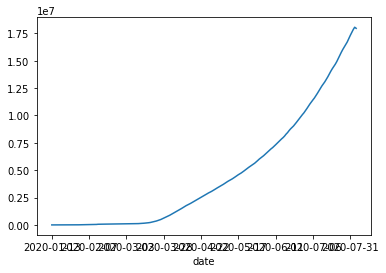

In [12]:
df.groupby('date')['tot_cases'].sum().plot()

In [22]:
df['cases'].apply(lambda x: max(0, x))

0        108
1         13
2        188
3        112
4        140
        ... 
31996      0
31997      0
31998      0
31999      1
32000      0
Name: cases, Length: 29233, dtype: int64

In [23]:
df[df.deaths < 0]

,date,day,month,year,cases,deaths,country,country_id,population,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,tot_deaths,tot_cases
7729,2020-07-06,6,7,2020,75,-3,Czechia,CZ,10650000.0,Europe,18.939323,348,12515
7730,2020-07-05,5,7,2020,121,-1,Czechia,CZ,10650000.0,Europe,18.704577,351,12440
15213,2020-06-25,25,6,2020,577,-31,Italy,IT,60359546.0,Europe,6.042126,34644,239410
27392,2020-05-25,25,5,2020,-372,-1918,Spain,ES,46937060.0,Europe,16.255812,26834,235400


In [19]:
df[(df.cases < 0) & (df.country == 'United Kingdom')]

,date,day,month,year,cases,deaths,country,country_id,population,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,tot_deaths,tot_cases
30311,2020-07-03,3,7,2020,-29726,89,United Kingdom,UK,66647112.0,Europe,-25.075355,43995,283757
30354,2020-05-21,21,5,2020,-525,363,United Kingdom,UK,66647112.0,Europe,70.658726,35704,248293


In [24]:
get_stringency_df(df)

,country,date,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,mtr_c_restrictions_on_gatherings,mtr_c_restrictions_on_gatherings_flag,...,stringency,stringency_disp,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
0,Aruba,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
1,Aruba,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
2,Aruba,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
3,Aruba,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,Aruba,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30277,Kosovo,2020-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5556,NaN,70.95,NaN,54.49,NaN,53.03,NaN,62.5
30278,Kosovo,2020-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5556,NaN,70.95,NaN,54.49,NaN,53.03,NaN,62.5
30279,Kosovo,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5556,NaN,70.95,NaN,54.49,NaN,53.03,NaN,62.5
30280,Kosovo,2020-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5556,NaN,70.95,NaN,54.49,NaN,53.03,NaN,62.5


In [19]:
df = get_final_df()

In [ ]:
df

In [21]:
df.columns

Index(['date', 'cases', 'deaths', 'country', 'popData2019', 'continent',
       'population', 'tot_deaths', 'tot_cases', 'iso_3166_2_code',
       'census_fips_code', 'pc_retail_and_recreation',
       'pc_grocery_and_pharmacy', 'pc_parks', 'pc_transit_stations',
       'pc_workplaces', 'pc_residential', 'mtr_c_school_closing',
       'mtr_c_workplace_closing', 'mtr_c_cancel_public_events',
       'mtr_c_restrictions_on_gatherings', 'mtr_c_close_public_transport',
       'mtr_c_stay_at_home_requirements',
       'mtr_c_restrictions_on_internal_movement',
       'mtr_c_international_travel_controls', 'stringency',
       'stringencylegacyindex', 'stringencylegacyindexfordisplay',
       'governmentresponseindex', 'governmentresponseindexfordisplay',
       'containmenthealthindex', 'containmenthealthindexfordisplay',
       'economicsupportindex', 'economicsupportindexfordisplay'],
      dtype='object')

In [13]:
df.dropna()

,date,day,month,year,cases,deaths,country,country_id,popData2019,continent,population,tot_deaths,tot_cases
0,2020-06-20,20,6,2020,346,2.0,Afghanistan,AF,38041757,Asia,0.0,548.0,27878
1,2020-06-19,19,6,2020,658,42.0,Afghanistan,AF,38041757,Asia,0.0,546.0,27532
2,2020-06-18,18,6,2020,564,13.0,Afghanistan,AF,38041757,Asia,0.0,504.0,26874
3,2020-06-17,17,6,2020,783,13.0,Afghanistan,AF,38041757,Asia,0.0,491.0,26310
4,2020-06-16,16,6,2020,761,7.0,Afghanistan,AF,38041757,Asia,0.0,478.0,25527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24339,2020-03-25,25,3,2020,0,0.0,Zimbabwe,ZW,14645473,Africa,0.0,1.0,2
24340,2020-03-24,24,3,2020,0,1.0,Zimbabwe,ZW,14645473,Africa,0.0,1.0,2
24341,2020-03-23,23,3,2020,0,0.0,Zimbabwe,ZW,14645473,Africa,0.0,0.0,2
24342,2020-03-22,22,3,2020,1,0.0,Zimbabwe,ZW,14645473,Africa,0.0,0.0,2


In [12]:
df[pd.isnull(df['tot_deaths'])]

,date,day,month,year,cases,deaths,country,country_id,popData2019,continent,population,tot_deaths,tot_cases
20862,2020-05-25,25,5,2020,-372,NaN,Spain,ES,46937060,Europe,0.0,NaN,235400


In [7]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
df = pd.read_excel(url)

In [8]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-20,20,6,2020,346,2.0,Afghanistan,AF,AFG,38041757,Asia
1,2020-06-19,19,6,2020,658,42.0,Afghanistan,AF,AFG,38041757,Asia
2,2020-06-18,18,6,2020,564,13.0,Afghanistan,AF,AFG,38041757,Asia
3,2020-06-17,17,6,2020,783,13.0,Afghanistan,AF,AFG,38041757,Asia
4,2020-06-16,16,6,2020,761,7.0,Afghanistan,AF,AFG,38041757,Asia
...,...,...,...,...,...,...,...,...,...,...,...
24339,2020-03-25,25,3,2020,0,0.0,Zimbabwe,ZW,ZWE,14645473,Africa
24340,2020-03-24,24,3,2020,0,1.0,Zimbabwe,ZW,ZWE,14645473,Africa
24341,2020-03-23,23,3,2020,0,0.0,Zimbabwe,ZW,ZWE,14645473,Africa
24342,2020-03-22,22,3,2020,1,0.0,Zimbabwe,ZW,ZWE,14645473,Africa


In [19]:
pd.to_datetime(df['dateRep'], format="%d/%m/%Y").dtype

dtype('<M8[ns]')

In [6]:
covid_df = get_covid_df()

AssertionError: 

In [ ]:
get_google_mobility_df(covid_df)

In [15]:
get_stringency_df(covid_df)

,country,date,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_school_closing_note,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_workplace_closing_note,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,...,stringency,stringency_disp,stringencylegacyindex,stringencylegacyindexfordisplay,governmentresponseindex,governmentresponseindexfordisplay,containmenthealthindex,containmenthealthindexfordisplay,economicsupportindex,economicsupportindexfordisplay
0,Aruba,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,Aruba,2020-01-02,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,2020-01-03,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,2020-01-04,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,2020-01-05,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28945,Kosovo,2020-06-08,2.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,...,0.5556,0.5556,70.95,70.95,54.49,54.49,53.03,53.03,62.5,62.5
28946,Kosovo,2020-06-09,2.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,...,0.5556,0.5556,70.95,70.95,54.49,54.49,53.03,53.03,62.5,62.5
28947,Kosovo,2020-06-10,2.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,...,0.5556,0.5556,70.95,70.95,54.49,54.49,53.03,53.03,62.5,62.5
28948,Kosovo,2020-06-11,2.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,...,0.5556,0.5556,70.95,70.95,54.49,54.49,53.03,53.03,62.5,62.5


In [16]:
df = get_final_df()

In [29]:
df.columns

Index(['date', 'cases', 'deaths', 'country', 'population', 'continent',
       'tot_deaths', 'tot_cases', 'pc_retail_and_recreation',
       'pc_grocery_and_pharmacy', 'pc_parks', 'pc_transit_stations',
       'pc_workplaces', 'pc_residential', 'mtr_c_school_closing',
       'mtr_c_workplace_closing', 'mtr_c_cancel_public_events',
       'mtr_c_restrictions_on_gatherings', 'mtr_c_close_public_transport',
       'mtr_c_stay_at_home_requirements',
       'mtr_c_restrictions_on_internal_movement',
       'mtr_c_international_travel_controls', 'stringency'],
      dtype='object')

In [8]:
df[]

,date,cases,deaths,country,population,continent,tot_deaths,tot_cases,pc_retail_and_recreation,pc_grocery_and_pharmacy,...,pc_residential,mtr_c_school_closing,mtr_c_workplace_closing,mtr_c_cancel_public_events,mtr_c_restrictions_on_gatherings,mtr_c_close_public_transport,mtr_c_stay_at_home_requirements,mtr_c_restrictions_on_internal_movement,mtr_c_international_travel_controls,stringency
0,2020-05-13,280,5,Afghanistan,37172386.0,Asia,127,4967,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-12,285,2,Afghanistan,37172386.0,Asia,122,4687,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-11,369,5,Afghanistan,37172386.0,Asia,120,4402,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-10,255,6,Afghanistan,37172386.0,Asia,115,4033,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-09,215,3,Afghanistan,37172386.0,Asia,109,3778,NaN,NaN,...,NaN,3.0,3.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16736,2020-03-25,0,0,Zimbabwe,14439018.0,Africa,1,2,-18.0,3.0,...,15.0,3.0,0.0,2.0,3.0,0.0,1.0,1.0,4.0,0.6256
16737,2020-03-24,0,1,Zimbabwe,14439018.0,Africa,1,2,-7.0,14.0,...,9.0,3.0,0.0,2.0,3.0,0.0,1.0,1.0,4.0,0.6256
16738,2020-03-23,0,0,Zimbabwe,14439018.0,Africa,0,2,-5.0,10.0,...,6.0,0.0,0.0,2.0,3.0,0.0,1.0,1.0,4.0,0.5145
16739,2020-03-22,1,0,Zimbabwe,14439018.0,Africa,0,2,-8.0,3.0,...,7.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.3016


In [48]:
df[df['country'] == 'Slovakia'].set_index('date').sort_index()['cases']

date
2020-03-07     1
2020-03-08     2
2020-03-09     2
2020-03-11     2
2020-03-12     3
              ..
2020-05-08    16
2020-05-09    10
2020-05-10     0
2020-05-11     2
2020-05-12     0
Name: cases, Length: 66, dtype: int64

In [10]:
df[[c for c in df.columns if c.startswith('mtr_c')]] / df[[c for c in df.columns if c.startswith('mtr_c')]].max()

,mtr_c_school_closing,mtr_c_workplace_closing,mtr_c_cancel_public_events,mtr_c_restrictions_on_gatherings,mtr_c_close_public_transport,mtr_c_stay_at_home_requirements,mtr_c_restrictions_on_internal_movement,mtr_c_international_travel_controls
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
16736,1.0,0.0,1.0,0.75,0.0,0.333333,0.5,1.00
16737,1.0,0.0,1.0,0.75,0.0,0.333333,0.5,1.00
16738,0.0,0.0,1.0,0.75,0.0,0.333333,0.5,1.00
16739,0.0,0.0,1.0,0.75,0.0,0.000000,0.0,0.25


In [9]:
df[[c for c in df.columns if c.startswith('mtr_c')]].describe()


,mtr_c_school_closing,mtr_c_workplace_closing,mtr_c_cancel_public_events,mtr_c_restrictions_on_gatherings,mtr_c_close_public_transport,mtr_c_stay_at_home_requirements,mtr_c_restrictions_on_internal_movement,mtr_c_international_travel_controls
count,12440.000000,12432.000000,12315.000000,12309.000000,12277.000000,12305.000000,12379.000000,12371.000000
mean,1.931752,1.393581,1.299229,2.049395,0.709701,1.035351,1.009613,2.510872
std,1.404890,1.310871,0.933659,1.807793,0.850286,1.064699,0.945342,1.609322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,3.000000
75%,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000


In [18]:
df.

(16322, 23)

In [19]:
df.columns

Index(['date', 'cases', 'deaths', 'country', 'population', 'continent',
       'tot_deaths', 'tot_cases', 'pc_retail_and_recreation',
       'pc_grocery_and_pharmacy', 'pc_parks', 'pc_transit_stations',
       'pc_workplaces', 'pc_residential', 'mtr_c_school_closing',
       'mtr_c_workplace_closing', 'mtr_c_cancel_public_events',
       'mtr_c_restrictions_on_gatherings', 'mtr_c_close_public_transport',
       'mtr_c_stay_at_home_requirements',
       'mtr_c_restrictions_on_internal_movement',
       'mtr_c_international_travel_controls', 'stringency'],
      dtype='object')

In [34]:
d = df[df['country'] == 'Slovakia']

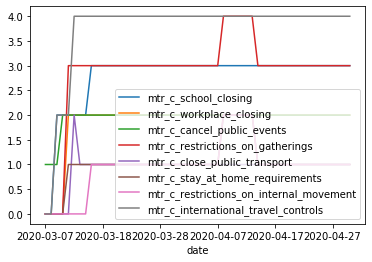

In [48]:
cols = [c for c in df.columns if 'mtr_c' in c and '_flag' not in c and '_note' not in c]
d.set_index('date').sort_index()[cols].plot()

In [39]:
d[[c for c in d.columns if c.startswith('mtr')]].describe()

,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,mtr_c_restrictions_on_gatherings,mtr_c_restrictions_on_gatherings_flag,mtr_c_close_public_transport,mtr_c_close_public_transport_flag,...,mtr_e_debt/contract_relief,mtr_e_fiscal_measures,mtr_e_international_support,mtr_h_public_information_campaigns,mtr_h_public_information_campaigns_flag,mtr_h_testing_policy,mtr_h_contact_tracing,mtr_h_emergency_investment_in_healthcare,mtr_h_investment_in_vaccines,mtr_m_wildcard
count,54.000000,52.000000,54.000000,50.000000,54.000000,54.0,54.000000,50.0,54.000000,49.000000,...,0.0,4.000000e+01,0.0,54.0,54.0,40.0,40.0,4.000000e+01,40.0,0.0
mean,2.777778,0.884615,1.851852,0.820000,1.944444,1.0,2.888889,1.0,0.925926,0.979592,...,NaN,5.557000e+07,NaN,2.0,1.0,1.0,2.0,1.541198e+06,0.0,NaN
std,0.634441,0.322603,0.528701,0.388088,0.231212,0.0,0.883105,0.0,0.328050,0.142857,...,NaN,3.514555e+08,NaN,0.0,0.0,0.0,0.0,9.747390e+06,0.0,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.0,0.000000,0.000000,...,NaN,0.000000e+00,NaN,2.0,1.0,1.0,2.0,0.000000e+00,0.0,NaN
25%,3.000000,1.000000,2.000000,1.000000,2.000000,1.0,3.000000,1.0,1.000000,1.000000,...,NaN,0.000000e+00,NaN,2.0,1.0,1.0,2.0,0.000000e+00,0.0,NaN
50%,3.000000,1.000000,2.000000,1.000000,2.000000,1.0,3.000000,1.0,1.000000,1.000000,...,NaN,0.000000e+00,NaN,2.0,1.0,1.0,2.0,0.000000e+00,0.0,NaN
75%,3.000000,1.000000,2.000000,1.000000,2.000000,1.0,3.000000,1.0,1.000000,1.000000,...,NaN,0.000000e+00,NaN,2.0,1.0,1.0,2.0,0.000000e+00,0.0,NaN
max,3.000000,1.000000,2.000000,1.000000,2.000000,1.0,4.000000,1.0,2.000000,1.000000,...,NaN,2.222800e+09,NaN,2.0,1.0,1.0,2.0,6.164791e+07,0.0,NaN


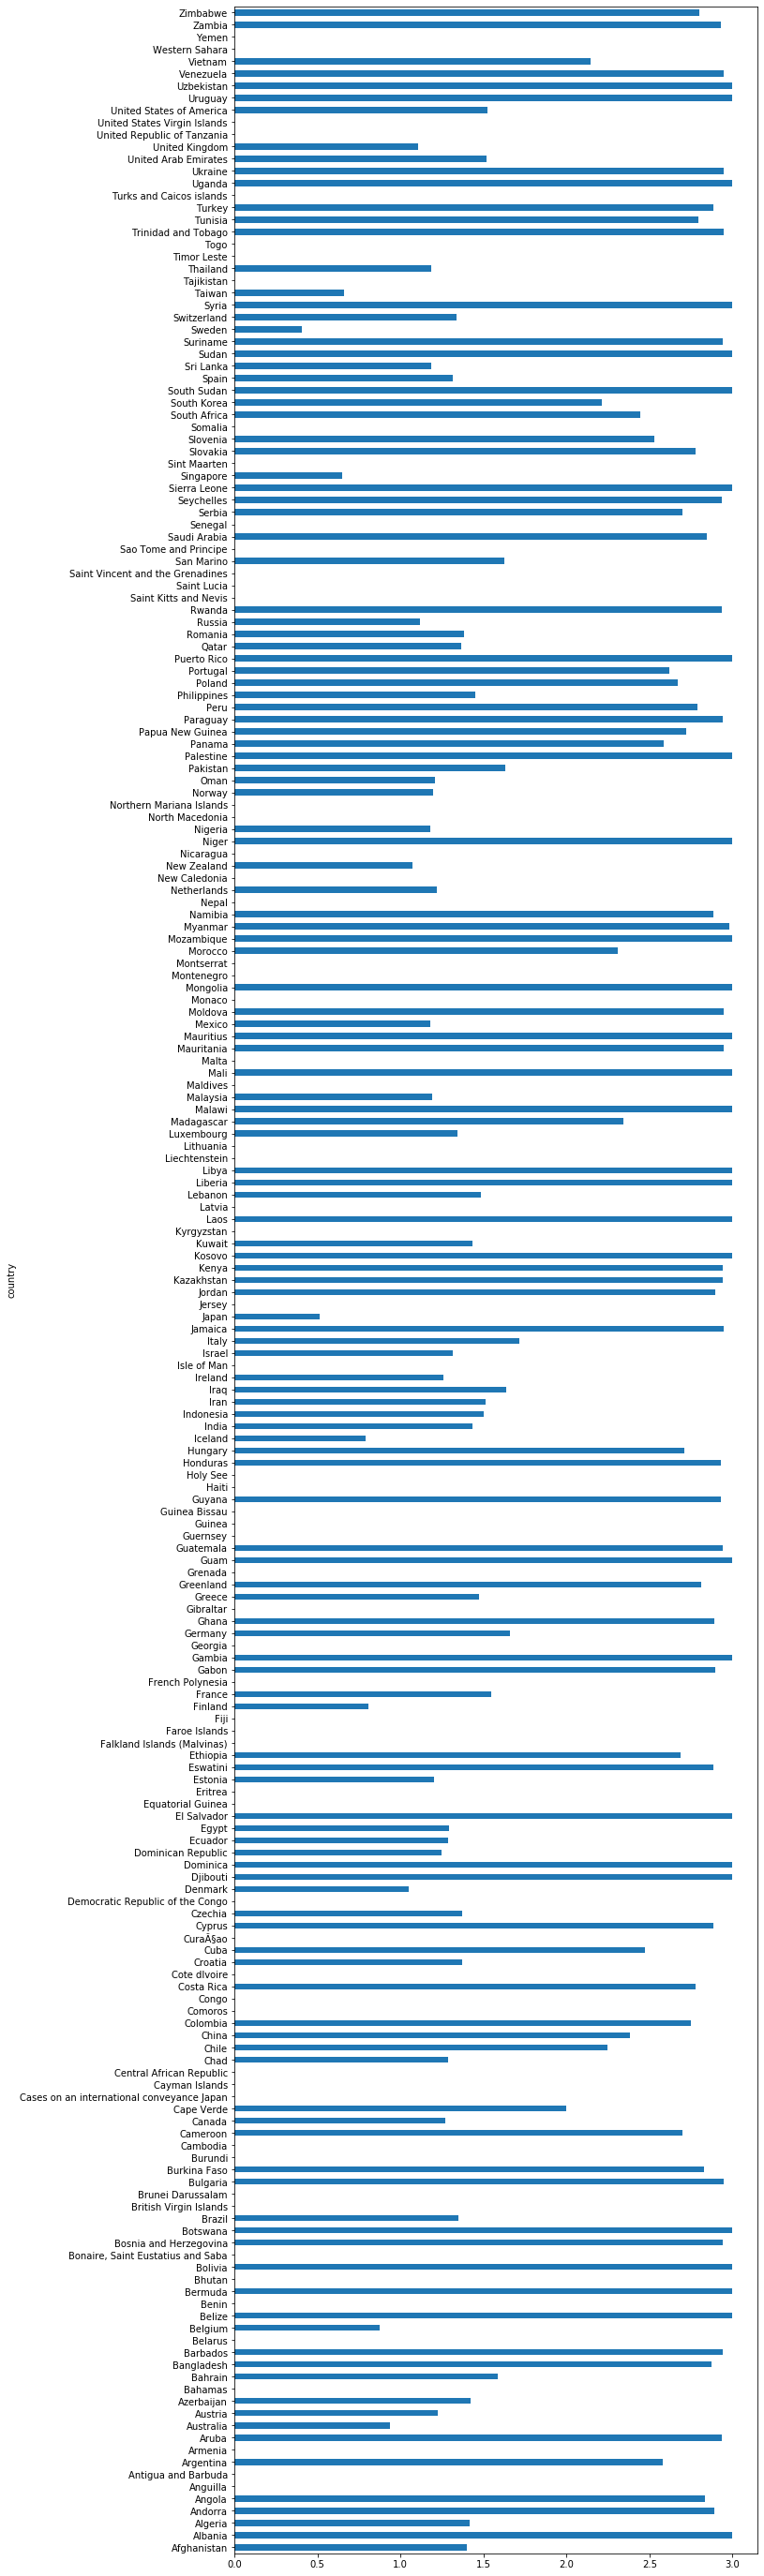

In [32]:
df.groupby('country').mean()['mtr_c_school_closing'].plot.barh(figsize=(10, 50))

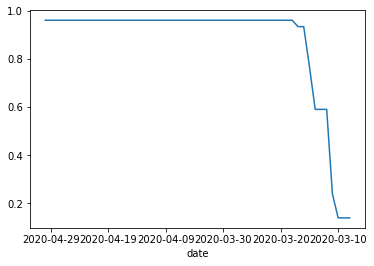

In [53]:
final_df[final_df['country'] == 'Peru'].set_index('date')['stringency'].plot()

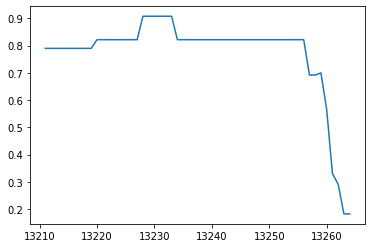

In [50]:
final_df[final_df['country'] == 'Slovakia']['stringency'].plot()

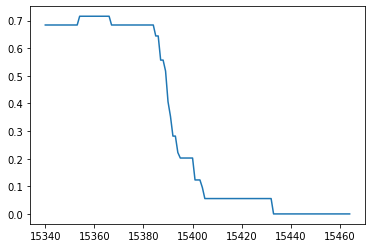

In [49]:
final_df[final_df['country'] == 'United States of America']['stringency'].plot()

In [10]:
df = final_df

In [16]:
sdf = get_stringency_df(covid_df)

In [ ]:
sdf

In [18]:
df = pd.read_csv('https://oxcgrtportal.azurewebsites.net/api/CSVDownload')

In [28]:
covid_df[['country', 'country_id']].drop_duplicates().values

array([['Afghanistan', 'AF'],
       ['Albania', 'AL'],
       ['Algeria', 'DZ'],
       ['Andorra', 'AD'],
       ['Angola', 'AO'],
       ['Anguilla', 'AI'],
       ['Antigua and Barbuda', 'AG'],
       ['Argentina', 'AR'],
       ['Armenia', 'AM'],
       ['Aruba', 'AW'],
       ['Australia', 'AU'],
       ['Austria', 'AT'],
       ['Azerbaijan', 'AZ'],
       ['Bahamas', 'BS'],
       ['Bahrain', 'BH'],
       ['Bangladesh', 'BD'],
       ['Barbados', 'BB'],
       ['Belarus', 'BY'],
       ['Belgium', 'BE'],
       ['Belize', 'BZ'],
       ['Benin', 'BJ'],
       ['Bermuda', 'BM'],
       ['Bhutan', 'BT'],
       ['Bolivia', 'BO'],
       ['Bonaire, Saint Eustatius and Saba', 'BQ'],
       ['Bosnia and Herzegovina', 'BA'],
       ['Botswana', 'BW'],
       ['Brazil', 'BR'],
       ['British Virgin Islands', 'VG'],
       ['Brunei Darussalam', 'BN'],
       ['Bulgaria', 'BG'],
       ['Burkina Faso', 'BF'],
       ['Burundi', 'BI'],
       ['Cambodia', 'KH'],
       ['Cameroon', 'C

In [25]:
df[['CountryName', 'CountryCode']].drop_duplicates().values

array([['Aruba', 'ABW'],
       ['Afghanistan', 'AFG'],
       ['Angola', 'AGO'],
       ['Albania', 'ALB'],
       ['Andorra', 'AND'],
       ['United Arab Emirates', 'ARE'],
       ['Argentina', 'ARG'],
       ['Australia', 'AUS'],
       ['Austria', 'AUT'],
       ['Azerbaijan', 'AZE'],
       ['Burundi', 'BDI'],
       ['Belgium', 'BEL'],
       ['Burkina Faso', 'BFA'],
       ['Bangladesh', 'BGD'],
       ['Bulgaria', 'BGR'],
       ['Bahrain', 'BHR'],
       ['Bosnia and Herzegovina', 'BIH'],
       ['Belize', 'BLZ'],
       ['Bermuda', 'BMU'],
       ['Bolivia', 'BOL'],
       ['Brazil', 'BRA'],
       ['Barbados', 'BRB'],
       ['Brunei', 'BRN'],
       ['Botswana', 'BWA'],
       ['Canada', 'CAN'],
       ['Switzerland', 'CHE'],
       ['Chile', 'CHL'],
       ['China', 'CHN'],
       ['Cameroon', 'CMR'],
       ['Democratic Republic of Congo', 'COD'],
       ['Colombia', 'COL'],
       ['Cape Verde', 'CPV'],
       ['Costa Rica', 'CRI'],
       ['Cuba', 'CUB'],
       ['Cypr

In [39]:
df['CountryName'].replace({
    'Slovak Republic': 'Slovakia',
    'United States': 'United States of America'
}).unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Botswana',
       'Canada', 'Switzerland', 'Chile', 'China', 'Cameroon',
       'Democratic Republic of Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Ghana', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
       'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan',
       'Japan', 'Kazakhstan', 'K

,country,date,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_school_closing_note,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_workplace_closing_note,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,...,mtr_h_contact_tracing,mtr_h_contact_tracing_flag,mtr_h_emergency_investment_in_healthcare,mtr_h_emergency_investment_in_healthcare_flag,mtr_h_investment_in_vaccines,mtr_h_investment_in_vaccines_flag,mtr_m_wildcard,mtr_m_wildcard_flag,stringency,stringency_disp


In [29]:
df.columns

Index(['country', 'Date', 'C1_School closing', 'C1_Flag', 'C1_Notes',
       'C2_Workplace closing', 'C2_Flag', 'C2_Notes',
       'C3_Cancel public events', 'C3_Flag', 'C3_Notes',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes',
       'C5_Close public transport', 'C5_Flag', 'C5_Notes',
       'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes',
       'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes',
       'C8_International travel controls', 'C8_Notes', 'E1_Income support',
       'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes',
       'E3_Fiscal measures', 'E3_Notes', 'E4_International support',
       'E4_Notes', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes',
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes',
       'H4_Emergency investment in healthcare', 'H4_Notes',
       'H5_Investment in vaccines', 'H5_Notes', 'M1_Wildcard', 'M1_Notes',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
  

In [34]:
def get_stringency_df(covid_df):
    df = pd.read_csv('https://oxcgrtportal.azurewebsites.net/api/CSVDownload')

    df = consolidate_country_col(df, 'CountryName', 'CountryCode', covid_df)

    df['Date'] = df['Date'].astype('str').apply(lambda x: f'{x[:4]}-{x[4:6]}-{x[6:]}')

    for c in [
        'LegacyStringencyIndex',
        'LegacyStringencyIndexForDisplay',
        'ConfirmedCases',
        'ConfirmedDeaths'
    ]:
        del df[c]
        
    df = df.rename(columns={
        'StringencyIndex': 'stringency',
        'StringencyIndexForDisplay': 'stringency_disp'
    })

    df.columns = [c.lower() for c in df.columns]

    for letter in ['c', 'e', 'h', 'm']:
        for i in range(1, 100):
            cols = [c for c in df.columns if f'{letter}{i}_' in c]
            if len(cols) == 0:
                continue
                
            name = '_'.join(cols[0].split('_')[1].split(' '))
            name_flag = f'{name}_flag'
            name_notes = f'{name}_note'
            
            new_names = [f'mtr_{letter}_{c}' for c in [name, name_flag, name_notes]]
            
            df = df.rename(columns={
                cols[i]: new_names[i] for i in range(len(cols))
            })
    
    df['stringency'] = df['stringency']/100
    df['stringency_disp'] = df['stringency_disp']/100

    return df

In [35]:
get_stringency_df(covid_df)

,country,date,mtr_c_school_closing,mtr_c_school_closing_flag,mtr_c_school_closing_note,mtr_c_workplace_closing,mtr_c_workplace_closing_flag,mtr_c_workplace_closing_note,mtr_c_cancel_public_events,mtr_c_cancel_public_events_flag,...,mtr_h_contact_tracing,mtr_h_contact_tracing_flag,mtr_h_emergency_investment_in_healthcare,mtr_h_emergency_investment_in_healthcare_flag,mtr_h_investment_in_vaccines,mtr_h_investment_in_vaccines_flag,mtr_m_wildcard,mtr_m_wildcard_flag,stringency,stringency_disp
0,Aruba,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000,0.0000
1,Afghanistan,2020-01-01,0.0,NaN,https://en.unesco.org/themes/education-emergen...,0.0,NaN,"Form January 1 to March 25th, there were no cl...",0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000,0.0000
2,Angola,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000,0.0000
3,Albania,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000,0.0000
4,Andorra,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,Vietnam,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.7831
18264,South Africa,2020-04-30,3.0,1.0,NaN,3.0,1.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914,0.9140
18265,Zambia,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6245
18266,Zimbabwe,2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9537


In [13]:
dates = covid_df['date'].unique()
dates.sort()
dates

array(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
       '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
       '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
       '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
       '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
       '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-

In [22]:
d = dates[0]
covid_df[covid_df['date'] == d].set_index('country')['tot_cases']

country
Afghanistan                 0
Algeria                     0
Armenia                     0
Australia                   0
Austria                     0
                           ..
Thailand                    0
United Arab Emirates        0
United Kingdom              0
United States of America    0
Vietnam                     0
Name: tot_cases, Length: 67, dtype: int64

In [7]:
covid_df

,date,day,month,year,cases,deaths,country,country_id,population,continentExp,tot_deaths,tot_cases
0,2020-04-25,25,4,2020,70,1,Afghanistan,AF,37172386.0,Asia,43,1351
1,2020-04-24,24,4,2020,105,2,Afghanistan,AF,37172386.0,Asia,42,1281
2,2020-04-23,23,4,2020,84,4,Afghanistan,AF,37172386.0,Asia,40,1176
3,2020-04-22,22,4,2020,61,1,Afghanistan,AF,37172386.0,Asia,36,1092
4,2020-04-21,21,4,2020,35,2,Afghanistan,AF,37172386.0,Asia,35,1031
...,...,...,...,...,...,...,...,...,...,...,...,...
13001,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14439018.0,Africa,1,2
13002,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14439018.0,Africa,1,2
13003,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14439018.0,Africa,0,2
13004,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14439018.0,Africa,0,2


In [38]:
fdf = procdata.get_final_df()

In [99]:
df = procdata.get_stringency_df(covid_df)

In [100]:
d = df[df['country'] == 'United Kingdom']
d['date'] = pd.to_datetime(d['date'])
d = d.set_index('date')

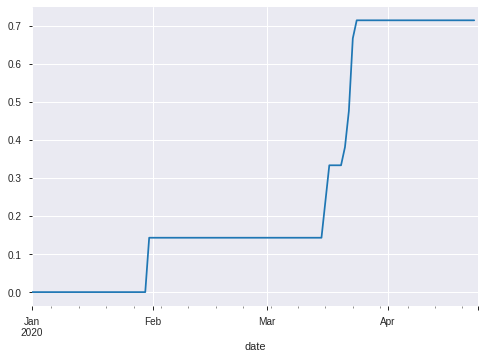

In [101]:
d['stringencyindex'].plot()

In [93]:
df.nunique()

country                                             141
date                                                115
metric_1_school_closing                               3
metric_1_school_closing_isgen                         2
metric_2_workplace_closing                            3
metric_2_workplace_closing_isgen                      2
metric_3_cancel_public_events                         3
metric_3_cancel_public_events_isgen                   2
metric_4_close_public_transport                       3
metric_4_close_public_transport_isgen                 2
metric_5_public_information_campaigns                 2
metric_5_public_information_campaigns_isgen           2
metric_6_restrictions_on_internal_movement            3
metric_6_restrictions_on_internal_movement_isgen      2
metric_7_international_travel_controls                4
metric_8_fiscal_measures                            251
metric_9_monetary_measures                           94
metric_10_emergency_investment_in_health_care   

In [89]:
import pandas_profiling as pdp

/home/fero/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [90]:
pdp.ProfileReport(df)

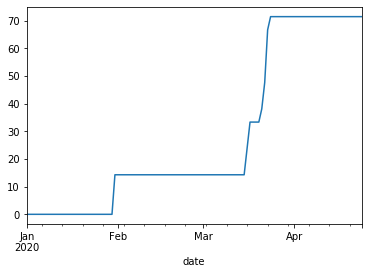

In [83]:
d['stringencyindexfordisplay'].plot()

In [41]:
fdf.head().columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'country',
       'country_id', 'population', 'continent', 'tot_deaths', 'tot_cases',
       'pc_retail_and_recreation', 'pc_grocery_and_pharmacy', 'pc_parks',
       'pc_transit_stations', 'pc_workplaces', 'pc_residential',
       's1_school closing', 's1_isgeneral', 's2_workplace closing',
       's2_isgeneral', 's3_cancel public events', 's3_isgeneral',
       's4_close public transport', 's4_isgeneral',
       's5_public information campaigns', 's5_isgeneral',
       's6_restrictions on internal movement', 's6_isgeneral',
       's7_international travel controls', 's8_fiscal measures',
       's9_monetary measures', 's10_emergency investment in health care',
       's11_investment in vaccines', 's12_testing framework',
       's13_contact tracing', 'confirmedcases', 'confirmeddeaths',
       'stringencyindex', 'stringencyindexfordisplay'],
      dtype='object')